## Data Cleaning

In [66]:
import numpy as np
import scipy.stats
import pandas as pd

In [67]:
import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [68]:
import re
import mailbox
import csv

In [4]:
billboard = pd.read_csv('./Ex_Files_Python_Statistics_EssT/Exercise Files/chapter2/02_04/billboard.csv',encoding='latin-1')

In [5]:
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
billboard.loc[billboard.track=="Maria, Maria",'genre'].values[0]

'Rock'

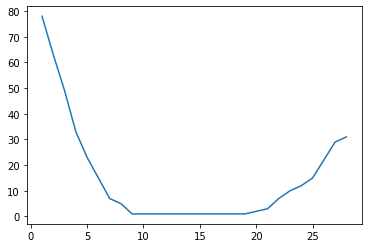

In [7]:
plt.plot(range(1,77),billboard.loc[0,'x1st.week':'x76th.week'])

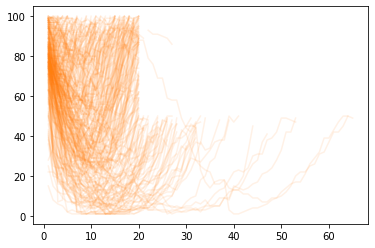

In [8]:
for index, row in billboard.iterrows():
    plt.plot(range(1,77),row['x1st.week':'x76th.week'],color='C1',alpha=0.1)

In [9]:
bshort = billboard[['artist.inverted','track','time','date.entered','x1st.week','x2nd.week','x3rd.week']]
bshort.columns = ['artist','track','time','date.entered','wk1','wk2','wk3']
bshort.head()

,artist,track,time,date.entered,wk1,wk2,wk3
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0


In [10]:
bmelt = bshort.melt(['artist','track','time','date.entered'],['wk1','wk2','wk3'],'week','rank')
bmelt.head()

,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,wk1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,wk1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,wk1,71.0
3,Madonna,Music,3:45,2000-08-12,wk1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,wk1,57.0


In [11]:
bmelt.query('track =="Liar"')

,artist,track,time,date.entered,week,rank
66,Profyle,Liar,3:57,2000-09-16,wk1,52.0
383,Profyle,Liar,3:57,2000-09-16,wk2,32.0
700,Profyle,Liar,3:57,2000-09-16,wk3,25.0


In [12]:
bmelt['week'] = bmelt['week'].apply(lambda x: int(x[2]))

In [13]:
bmelt['date.entered'] = pd.to_datetime(bmelt['date.entered'])

In [14]:
bmelt['date'] = bmelt['date.entered'] + pd.Timedelta('7 days') * (bmelt['week']-1)

In [15]:
bmelt.drop(['date.entered'],1,inplace=True)

In [16]:
bfinal = bmelt[['artist','track','time','date','week','rank']]
bfinal.sort_values(['artist','track'],inplace=True)

In [17]:
bfinal.head()

,artist,track,time,date,week,rank
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,1,87.0
563,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-04,2,82.0
880,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-11,3,72.0
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02,1,91.0
604,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-09,2,87.0


In [18]:
tracks = bfinal[['artist','track','time']].drop_duplicates()
tracks.head()

,artist,track,time
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
24,3 Doors Down,Kryptonite,3:53
193,3 Doors Down,Loser,4:24
69,504 Boyz,Wobble Wobble,3:35


In [19]:
tracks.index.name = 'id'
trackid = tracks.reset_index()
trackid.head()

,id,artist,track,time
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
1,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
2,24,3 Doors Down,Kryptonite,3:53
3,193,3 Doors Down,Loser,4:24
4,69,504 Boyz,Wobble Wobble,3:35


In [20]:
tidy = pd.merge(trackid, bfinal, on=['track','artist','time']).drop(['artist','track','time'], axis=1)

In [21]:
tidy.head()

,id,date,week,rank
0,246,2000-02-26,1,87.0
1,246,2000-03-04,2,82.0
2,246,2000-03-11,3,72.0
3,287,2000-09-02,1,91.0
4,287,2000-09-09,2,87.0


In [22]:
tidy[tidy.week == 1]['rank'].idxmin()

756

## 2

In [23]:
tb = pd.read_csv('./Ex_Files_Python_Statistics_EssT/Exercise Files/chapter2/02_05/tb.csv')
final = pd.read_csv('./Ex_Files_Python_Statistics_EssT/Exercise Files/chapter2/02_05/final.csv')

In [24]:
tb.head()

,country,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
final.head()

,country,year,age,sex,cases
0,AD,1996,15-24,f,1.0
1,AD,1996,15-24,m,0.0
2,AD,1996,25-34,f,1.0
3,AD,1996,25-34,m,0.0
4,AD,1996,35-44,f,0.0


In [26]:
tb.columns

Index(['country', 'year', 'm04', 'm514', 'm014', 'm1524', 'm2534', 'm3544',
       'm4554', 'm5564', 'm65', 'mu', 'f04', 'f514', 'f014', 'f1524', 'f2534',
       'f3544', 'f4554', 'f5564', 'f65', 'fu'],
      dtype='object')

In [27]:
melted = tb.melt(['country','year'],['m04', 'm514', 'm014', 'm1524', 'm2534', 'm3544',
       'm4554', 'm5564', 'm65', 'mu', 'f04', 'f514', 'f014', 'f1524', 'f2534',
       'f3544', 'f4554', 'f5564', 'f65', 'fu'],'sexage','cases')

In [28]:
melted.head()

,country,year,sexage,cases
0,AD,1989,m04,NaN
1,AD,1990,m04,NaN
2,AD,1991,m04,NaN
3,AD,1992,m04,NaN
4,AD,1993,m04,NaN


In [29]:
melted['sex'] = melted['sexage'].str.slice(0,1)
melted['age'] = melted['sexage'].str.slice(1)

In [30]:
melted.head()

,country,year,sexage,cases,sex,age
0,AD,1989,m04,NaN,m,04
1,AD,1990,m04,NaN,m,04
2,AD,1991,m04,NaN,m,04
3,AD,1992,m04,NaN,m,04
4,AD,1993,m04,NaN,m,04


In [31]:
melted['age'] = melted['age'].map({'04':'0-4','514':'5-14','1524':'15-24','2534':'25-34','3544':'35-44','4554':'45-54','5564':'55-64','65':'65+','u':np.nan})

In [32]:
melted.head()

,country,year,sexage,cases,sex,age
0,AD,1989,m04,NaN,m,0-4
1,AD,1990,m04,NaN,m,0-4
2,AD,1991,m04,NaN,m,0-4
3,AD,1992,m04,NaN,m,0-4
4,AD,1993,m04,NaN,m,0-4


In [33]:
final = melted.dropna(subset=['cases'])

In [34]:
final.head()

,country,year,sexage,cases,sex,age
15,AD,2005,m04,0.0,m,0-4
16,AD,2006,m04,0.0,m,0-4
18,AD,2008,m04,0.0,m,0-4
42,AE,2006,m04,0.0,m,0-4
43,AE,2007,m04,0.0,m,0-4


In [35]:
final.sort_values(['country','year','age','sex'])
final.head()

,country,year,sexage,cases,sex,age
15,AD,2005,m04,0.0,m,0-4
16,AD,2006,m04,0.0,m,0-4
18,AD,2008,m04,0.0,m,0-4
42,AE,2006,m04,0.0,m,0-4
43,AE,2007,m04,0.0,m,0-4


In [36]:
final = final[['country','year','age','sex','cases']]
final.head()

,country,year,age,sex,cases
15,AD,2005,0-4,m,0.0
16,AD,2006,0-4,m,0.0
18,AD,2008,0-4,m,0.0
42,AE,2006,0-4,m,0.0
43,AE,2007,0-4,m,0.0


In [37]:
"""
Statistics is the science of learning from data
"""

'\nStatistics is the science of learning from data\n'

## visualization

In [38]:
import scipy.stats

In [39]:
from IPython import display
from ipywidgets import interact, widgets

In [40]:
import re , mailbox , csv

In [41]:
gapminder = pd.read_csv('./Ex_Files_Python_Statistics_EssT/Exercise Files/chapter3/03_01/gapminder.csv')
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


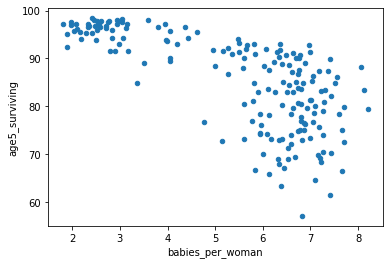

In [42]:
gapminder[gapminder.year == 1965].plot.scatter('babies_per_woman','age5_surviving')

In [64]:
def plotyear(year):
    data = gapminder[gapminder.year == year]
    area = 5e-6 * data.population
    colors = data.region.map({
        'Africa': 'skyblue',
        'Europe': 'gold',
        'America': 'palegreen',
        'Asia': 'coral'
    })
    data.plot.scatter('babies_per_woman',
                      'age5_surviving',
                      s=area,
                      c=colors,
                      linewidths=1,
                      edgecolors='k',
                      figsize=(12, 9))
    
    plt.axis(ymin=50, ymax=105, xmin=0, xmax=8)
    plt.xlabel('babies per woman')
    plt.ylabel('% children alive at 5')

In [65]:
interact(plotyear, year=widgets.IntSlider(min=1950, max=2015, step=1, value=1965))

interactive(children=(IntSlider(value=1965, description='year', max=2015, min=1950), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

### Distributions

In [70]:
china1965 = pd.read_csv('./Ex_Files_Python_Statistics_EssT/Exercise Files/chapter3/03_02/income-1965-china.csv')
china2015 = pd.read_csv('./Ex_Files_Python_Statistics_EssT/Exercise Files/chapter3/03_02/income-2015-china.csv')
usa1965 = pd.read_csv('./Ex_Files_Python_Statistics_EssT/Exercise Files/chapter3/03_02/income-1965-usa.csv')
usa2015 = pd.read_csv('./Ex_Files_Python_Statistics_EssT/Exercise Files/chapter3/03_02/income-2015-usa.csv')

In [72]:
china1965.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   income        1000 non-null   float64
 1   log10_income  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [73]:
china1965.head()

,income,log10_income
0,1.026259,0.011257
1,0.912053,-0.039980
2,0.110699,-0.955857
3,0.469659,-0.328217
4,0.374626,-0.426402


In [74]:
china1965.min()

income          0.041968
log10_income   -1.377078
dtype: float64

In [75]:
china1965.var(ddof=0)

income          0.208846
log10_income    0.088610
dtype: float64

In [76]:
china1965.quantile([0.25,0.75])

,income,log10_income
0.25,0.344130,-0.463277
0.75,0.863695,-0.063640


In [77]:
china1965.quantile(0.5)

income          0.557477
log10_income   -0.253773
Name: 0.5, dtype: float64

In [78]:
china1965.median()

income          0.557477
log10_income   -0.253773
dtype: float64

In [79]:
scipy.stats.percentileofscore(china1965.income, 1.5)

95.5

In [80]:
china1965.describe()

,income,log10_income
count,1000.000000,1000.000000
mean,0.660597,-0.274157
std,0.457226,0.297822
min,0.041968,-1.377078
25%,0.344130,-0.463277
50%,0.557477,-0.253773
75%,0.863695,-0.063640
max,5.426802,0.734544


In [81]:
usa1965.describe()

,income,log10_income
count,1000.000000,1000.000000
mean,31.587965,1.418835
std,22.101531,0.262200
min,4.177852,0.620953
25%,17.498592,1.243003
50%,26.069531,1.416133
75%,39.017113,1.591255
max,246.030397,2.390989


### Histograms

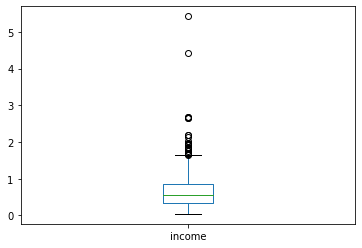

In [82]:
china1965.income.plot(kind='box')

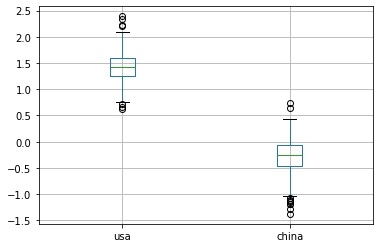

In [83]:
pd.DataFrame({'usa': usa1965.log10_income, 'china': china1965.log10_income}).boxplot()

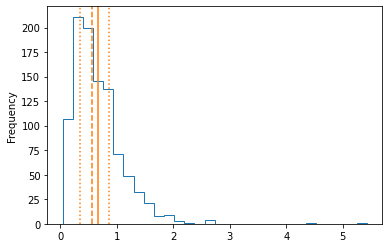

In [84]:
china1965.income.plot(kind='hist',histtype='step',bins=30)

pp.axvline(china1965.income.mean(),c='C1')
pp.axvline(china1965.income.median(),c='C1',linestyle='--')
pp.axvline(china1965.income.quantile(0.25),c='C1',linestyle=':')
pp.axvline(china1965.income.quantile(0.75),c='C1',linestyle=':')

(0.0, 3.0, 0.0, 1.2342999882944066)

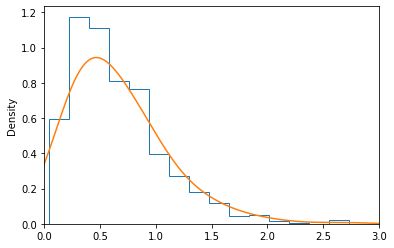

In [85]:
china1965.income.plot(kind='hist',histtype='step',bins=30,density=True)
china1965.income.plot.density(bw_method=0.5)

pp.axis(xmin=0,xmax=3)

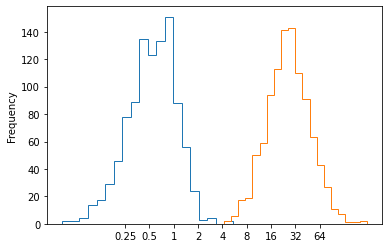

In [86]:
china1965.log10_income.plot.hist(histtype='step',bins=20)
usa1965.log10_income.plot.hist(histtype='step',bins=20)

levels = [0.25,0.5,1,2,4,8,16,32,64]
pp.xticks(np.log10(levels),levels);

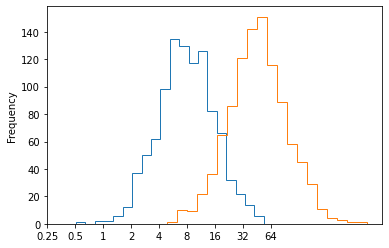

In [87]:
china2015.log10_income.plot.hist(histtype='step',bins=20)
usa2015.log10_income.plot.hist(histtype='step',bins=20)

levels = [0.25,0.5,1,2,4,8,16,32,64]
pp.xticks(np.log10(levels),levels);

In [88]:
china_pop2015 = float(gapminder.query('country == "China" and year == 2015').population)
usa_pop2015 = float(gapminder.query('country == "United States" and year == 2015').population)

In [89]:
china2015['weight'] = china_pop2015 / len(china2015)
usa2015['weight'] = usa_pop2015 / len(usa2015)

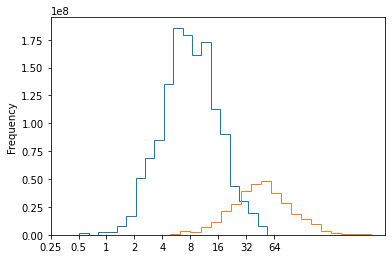

In [90]:
china2015.log10_income.plot.hist(histtype='step',bins=20,weights=china2015.weight)
usa2015.log10_income.plot.hist(histtype='step',bins=20,weights=usa2015.weight)

levels = [0.25,0.5,1,2,4,8,16,32,64]
pp.xticks(np.log10(levels),levels);

### Two variable analysis

In [91]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  float64
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  float64
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [92]:
italy = gapminder.query('country == "Italy"')
italy.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
6397,Italy,1800,Europe,18822234.0,29.69,54.259,5.47,2225.0,6.091718
6398,Italy,1810,Europe,19491674.0,29.69,54.395,5.47,2371.0,6.491444
6399,Italy,1820,Europe,20341608.0,29.69,54.531,5.47,2474.0,6.773443
6400,Italy,1830,Europe,21529667.0,29.69,54.667,5.47,2471.0,6.765229
6401,Italy,1840,Europe,22956667.0,29.69,54.804,5.47,2524.0,6.910335


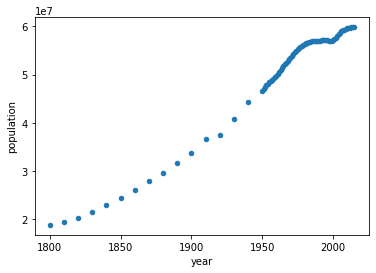

In [93]:
italy.plot.scatter("year", "population")

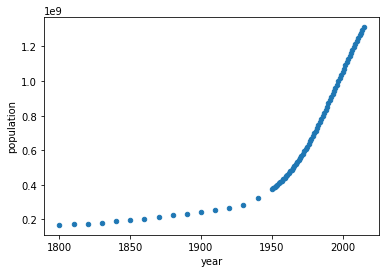

In [94]:
gapminder.query('country == "India"').plot.scatter("year","population")

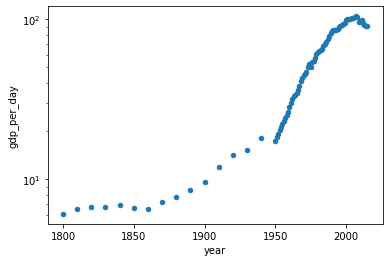

In [95]:
italy.plot.scatter("year", "gdp_per_day", logy=True)

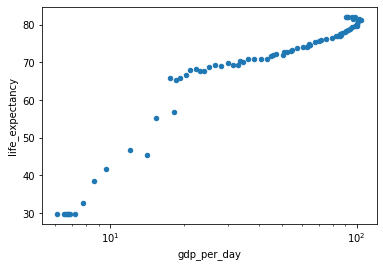

In [96]:
italy.plot.scatter("gdp_per_day", "life_expectancy", logx=True)

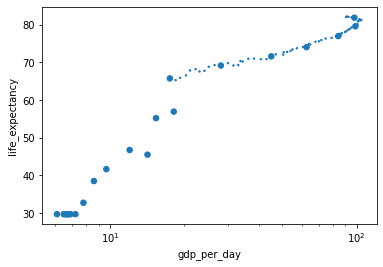

In [97]:
size = np.where(italy.year % 10 == 0,30,2)

italy.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size)

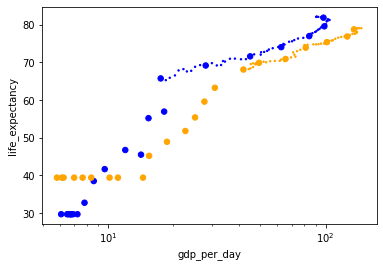

In [98]:
data = gapminder.query('(country == "Italy") or (country == "United States")')

size = np.where(data.year % 10 == 0,30,2)
color = np.where(data.country == 'Italy','blue','orange')

data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size, c=color)

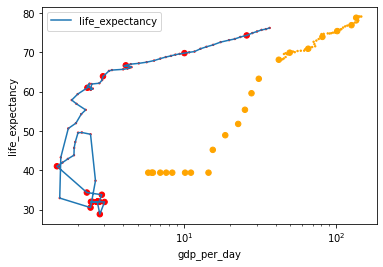

In [99]:
data = gapminder.query('(country == "China") or (country == "United States")')

size = np.where(data.year % 10 == 0,30,2)
color = np.where(data.country == 'China','red','orange')

ax = data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size, c=color)

data[data.country == 'China'].plot.line(x='gdp_per_day',y='life_expectancy',ax=ax)

### More variables

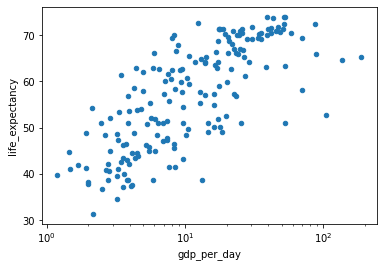

In [100]:
def plotyear(year):
    data = gapminder[gapminder.year == year]
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True)

plotyear(1965)

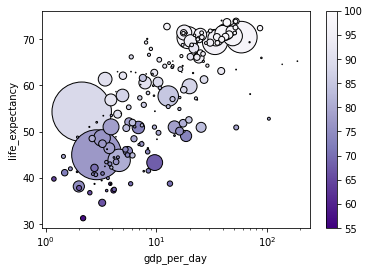

In [101]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                      linewidths=1, edgecolors='k', sharex=False)

plotyear(1965)

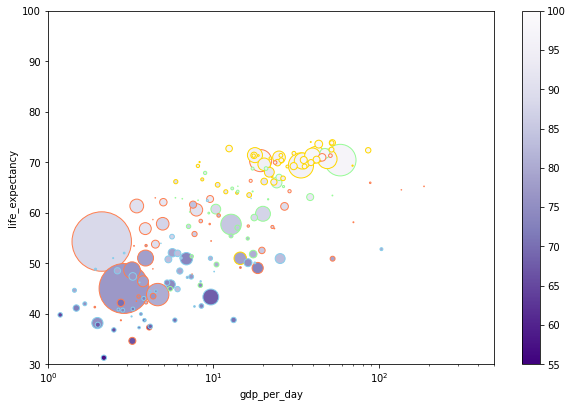

In [102]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue','Europe': 'gold','America': 'palegreen','Asia': 'coral'})
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                      linewidths=1, edgecolors=edgecolor, sharex=False,
                      figsize=(10,6.5))

    pp.axis(xmin=1,xmax=500,ymin=30,ymax=100)
    
plotyear(1965)

In [103]:
interact(plotyear,year=range(1965,2016,10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

<function __main__.plotyear(year)>

In [104]:
gapminder[gapminder.year == 2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

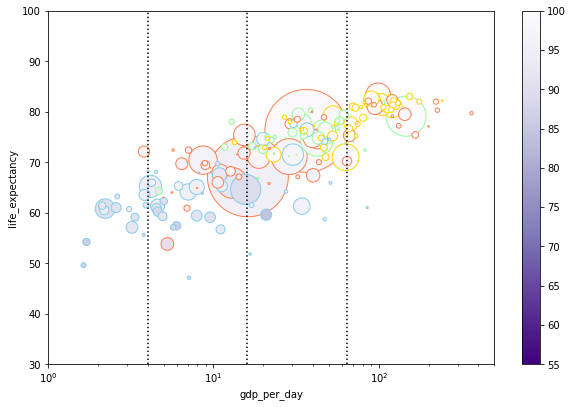

In [105]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue','Europe': 'gold','America': 'palegreen','Asia': 'coral'})
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                      linewidths=1, edgecolors=edgecolor, sharex=False,
                      figsize=(10,6.5))

    for level in [4,16,64]:
        pp.axvline(level,linestyle=':',color='k')
    
    pp.axis(xmin=1,xmax=500,ymin=30,ymax=100)
    
plotyear(2015)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128fc0290>,
      dtype=object)

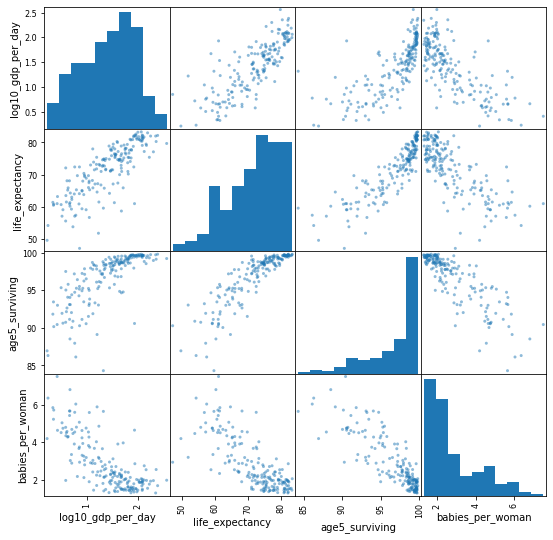

In [109]:
gapminder['log10_gdp_per_day'] = np.log10(gapminder['gdp_per_day'])
data = gapminder.loc[gapminder.year == 2015,['log10_gdp_per_day','life_expectancy','age5_surviving','babies_per_woman']]

import pandas
pandas.plotting.scatter_matrix(data,figsize=(9,9))

## Handling categorical data

In [110]:
smoking = pd.read_csv('./Ex_Files_Python_Statistics_EssT/Exercise Files/chapter3/03_06/whickham.csv')
smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   outcome  1314 non-null   object
 1   smoker   1314 non-null   object
 2   age      1314 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 30.9+ KB


In [111]:
pd.DataFrame(smoking.smoker.value_counts())

,smoker
No,732
Yes,582


In [112]:
pd.DataFrame(smoking.outcome.value_counts())

,outcome
Alive,945
Dead,369


In [113]:
pd.DataFrame(smoking.outcome.value_counts(normalize=True))

,outcome
Alive,0.719178
Dead,0.280822


In [114]:
bysmoker = smoking.groupby("smoker").outcome.value_counts(normalize=True)
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [115]:
bysmoker.index

MultiIndex([( 'No', 'Alive'),
            ( 'No',  'Dead'),
            ('Yes', 'Alive'),
            ('Yes',  'Dead')],
           names=['smoker', 'outcome'])

In [116]:
bysmoker.unstack()

outcome,Alive,Dead
smoker,,
No,0.685792,0.314208
Yes,0.761168,0.238832


In [117]:
smoking['ageGroup'] = pd.cut(smoking.age,[0,30,40,53,64],labels=['0-30','30-40','40-53','53-64'])

In [118]:
smoking['ageGroup'].head()

0     0-30
1     0-30
2      NaN
3      NaN
4    53-64
Name: ageGroup, dtype: category
Categories (4, object): [0-30 < 30-40 < 40-53 < 53-64]

In [119]:
smoking['age'].head()

0    23
1    18
2    71
3    67
4    64
Name: age, dtype: int64

In [120]:
byage = smoking.groupby(['ageGroup','smoker']).outcome.value_counts(normalize=True)

In [121]:
byage.unstack().drop("Dead",axis=1)

outcome             Alive
ageGroup smoker          
0-30     No      0.981818
         Yes     0.975610
30-40    No      0.955224
         Yes     0.940678
40-53    No      0.876106
         Yes     0.802395
53-64    No      0.669291
         Yes     0.580645

In [122]:
bysmoker = smoking.groupby("smoker").outcome.value_counts(normalize=True)

In [123]:
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [124]:
byage

ageGroup  smoker  outcome
0-30      No      Alive      0.981818
                  Dead       0.018182
          Yes     Alive      0.975610
                  Dead       0.024390
30-40     No      Alive      0.955224
                  Dead       0.044776
          Yes     Alive      0.940678
                  Dead       0.059322
40-53     No      Alive      0.876106
                  Dead       0.123894
          Yes     Alive      0.802395
                  Dead       0.197605
53-64     No      Alive      0.669291
                  Dead       0.330709
          Yes     Alive      0.580645
                  Dead       0.419355
Name: outcome, dtype: float64

Text(0.5, 1.0, 'smoker')

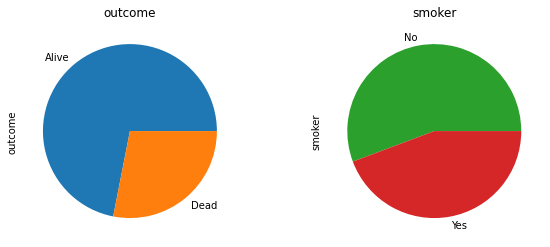

In [125]:
pp.figure(figsize=(10,4))
pp.subplot(1,2,1); smoking.outcome.value_counts().plot(kind='pie',colors=['C0','C1']); pp.title('outcome')
pp.subplot(1,2,2); smoking.smoker.value_counts().plot(kind='pie',colors=['C2','C3']); pp.title('smoker')

In [126]:
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

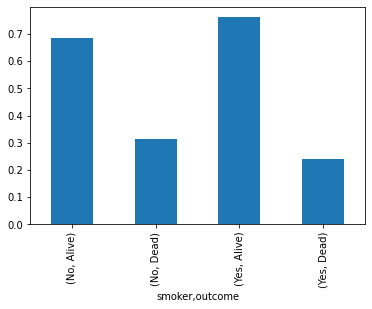

In [128]:
bysmoker.plot(kind='bar')

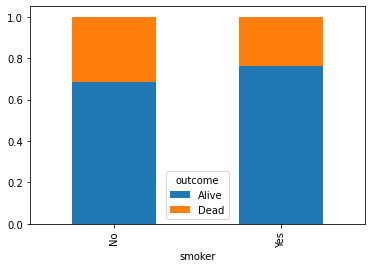

In [129]:
bysmoker.unstack().plot(kind='bar',stacked=True)

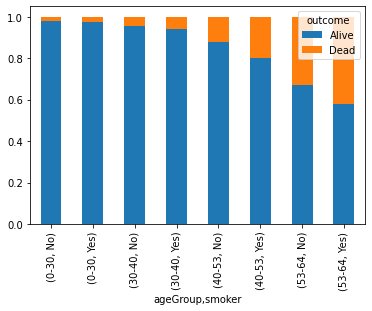

In [130]:
byage.unstack().plot(kind='bar',stacked=True)

In [131]:
byage.unstack().drop("Dead",axis=1).unstack()

outcome      Alive          
smoker          No       Yes
ageGroup                    
0-30      0.981818  0.975610
30-40     0.955224  0.940678
40-53     0.876106  0.802395
53-64     0.669291  0.580645

In [132]:
byage2 = byage.unstack().drop("Dead",axis=1).unstack()

byage2.columns = ["No","Yes"]
byage2.columns.name = "smoker"

In [133]:
byage2

smoker,No,Yes
ageGroup,,
0-30,0.981818,0.975610
30-40,0.955224,0.940678
40-53,0.876106,0.802395
53-64,0.669291,0.580645


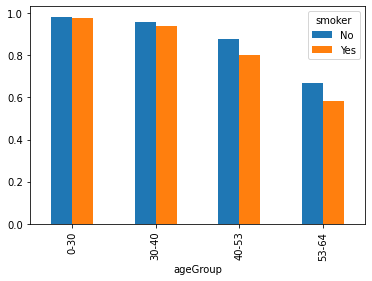

In [134]:
byage2.plot(kind='bar')

## Mailbox analysis

In [175]:
messages = pd.read_csv('./Ex_Files_Python_Statistics_EssT/Exercise Files/chapter3/03_08/mbox-anonymized.csv')


In [176]:
messages.head()

,subject,from,to,date
0,Why control quickly exactly capital.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...","""Trevor Charles"" <zrodriguez@hotmail.com>","Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,Michele Vallisneri <Michele.Vallisneri@jpl.nas...,"""Heather Hernandez"" <patriciagarcia@garcia-car...","Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,"""Vallisneri, Michele (335S)"" <michele.vallisne...",Bryce Dudley <hailey63@frazier.com>,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...",Kathryn Mathis <josephrebecca@grimes.com>,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,"""Vallisneri, Michele (335S)"" <michele.vallisne...","""Angela Mendoza"" <rkhan@yahoo.com>","Tue, 31 Oct 2017 00:13:00 +0000"


In [177]:
messages.keys()

Index(['subject', 'from', 'to', 'date'], dtype='object')

In [178]:
messages['from'][0]

'"Vallisneri, Michele (335S)" <Michele.Vallisneri@jpl.nasa.gov>'

In [179]:
def clean_address(raw):
    match = re.search('<(.+)>',raw)
    
    if match is None:
        return raw
    else:
        return match.group(1)

In [180]:
clean_address(messages['from'][0])

'Michele.Vallisneri@jpl.nasa.gov'

In [181]:
messages['from'] = messages['from'].dropna().apply(clean_address)

In [182]:
messages['to'] = messages['to'].dropna().apply(clean_address)

In [183]:
messages.head()

,subject,from,to,date
0,Why control quickly exactly capital.,Michele.Vallisneri@jpl.nasa.gov,zrodriguez@hotmail.com,"Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,Michele.Vallisneri@jpl.nasa.gov,patriciagarcia@garcia-carney.com,"Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,michele.vallisneri@jpl.nasa.gov,hailey63@frazier.com,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,Michele.Vallisneri@jpl.nasa.gov,josephrebecca@grimes.com,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,michele.vallisneri@jpl.nasa.gov,rkhan@yahoo.com,"Tue, 31 Oct 2017 00:13:00 +0000"


In [184]:
messages['date'][0]

'Mon, 27 Nov 2017 14:18:46 -0800'

In [185]:
pd.to_datetime(messages['date'][0]).tz_convert('utc').tz_convert('America/Los_Angeles')

Timestamp('2017-11-27 14:18:46-0800', tz='America/Los_Angeles')

In [186]:
messages['date'] = messages['date'].apply(lambda s: pd.to_datetime(s).tz_convert('UTC').tz_convert('America/Los_Angeles'))

In [187]:
messages.date.head()

0   2017-11-27 14:18:46-08:00
1   2018-03-26 18:38:16-07:00
2   2018-02-13 14:54:50-08:00
3   2018-01-26 11:40:04-08:00
4   2017-10-30 17:13:00-07:00
Name: date, dtype: datetime64[ns, America/Los_Angeles]

In [190]:
messages['dayofweek'] = pd.Categorical(messages['date'].dt.day_name(),
                                       ordered=True,
                                       categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [191]:
messages['timeofday'] = messages['date'].dt.hour + messages['date'].dt.minute / 60

In [192]:
messages['nyear'] = messages['date'].dt.year + messages['date'].dt.dayofyear/365.25 + messages['timeofday']/24/365.25 

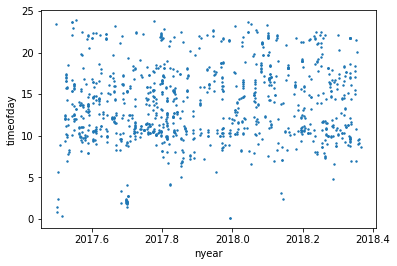

In [193]:
messages.plot.scatter('nyear','timeofday',s=2)

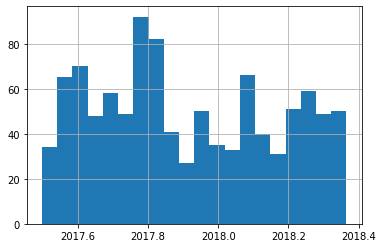

In [194]:
messages.nyear.hist(bins=20)

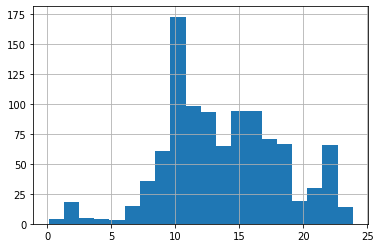

In [195]:
messages.timeofday.hist(bins=20)

In [196]:
messages.dayofweek.value_counts()

Monday       222
Tuesday      220
Wednesday    211
Thursday     172
Friday       140
Sunday        33
Saturday      32
Name: dayofweek, dtype: int64

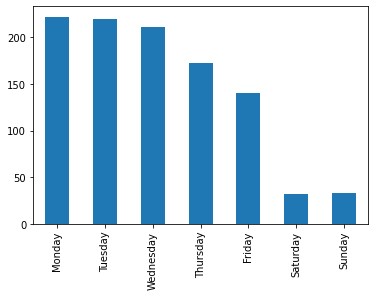

In [197]:
counts = messages.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

In [198]:
messages['dayofweek'] = pd.Categorical(messages['dayofweek'],
                                       ordered = True,
                                       categories = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

In [199]:
days = messages.dayofweek.cat.categories

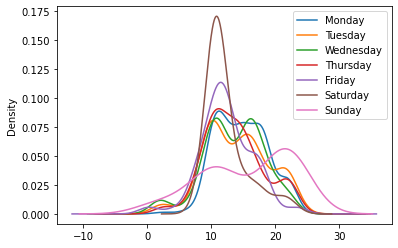

In [200]:
for day in days:
    messages[messages.dayofweek == day].timeofday.plot(kind='density')
    
plt.legend(days)

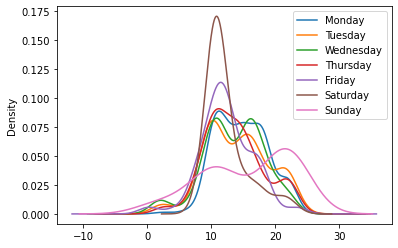

In [201]:
messages.groupby('dayofweek').timeofday.plot(kind='density')
plt.legend(days)

## Confidence Interval

In [202]:
poll = pd.read_csv('./Ex_Files_Python_Statistics_EssT/Exercise Files/chapter4/04_02/poll.csv')
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [203]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [204]:
poll.vote.value_counts()

Brown    511
Green    489
Name: vote, dtype: int64

In [205]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [206]:
def sample(brown,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [207]:
s = sample(0.51,n=1000)

In [208]:
s.vote.value_counts(normalize=True)

Brown    0.523
Green    0.477
Name: vote, dtype: float64

In [209]:
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [210]:
dist.head()

,Brown,Green
vote,0.528,0.472
vote,0.502,0.498
vote,0.527,0.473
vote,0.533,0.467
vote,0.511,0.489


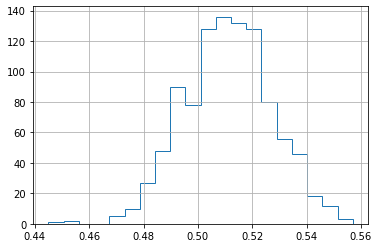

In [211]:
dist.Brown.hist(histtype='step',bins=20)

In [212]:
def samplingdist(brown,n=1000):
    return pd.DataFrame([sample(brown,n).vote.value_counts(normalize=True) for i in range(1000)])

In [213]:
def quantiles(brown,n=1000):
    dist = samplingdist(brown,n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [214]:
quantiles(0.50)

(0.470975, 0.532)

In [215]:
quantiles(0.48)

(0.449975, 0.511)

In [216]:
quantiles(0.54)

(0.508, 0.570025)

In [217]:
dist = samplingdist(0.50,10000)

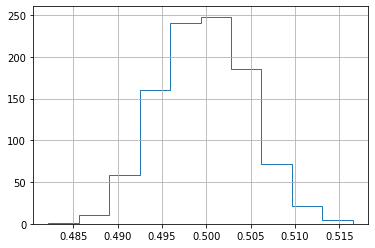

In [218]:
dist.Brown.hist(histtype='step')

In [219]:
largepoll = pd.read_csv('./Ex_Files_Python_Statistics_EssT/Exercise Files/chapter4/04_02/poll-larger.csv')

## Bootstrapping

In [220]:
pop = pd.read_csv('./Ex_Files_Python_Statistics_EssT/Exercise Files/chapter4/04_03/grades.csv')
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


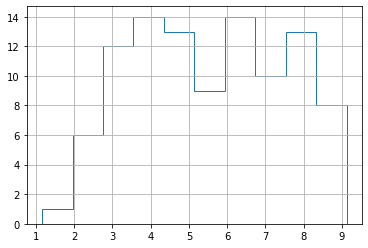

In [221]:
pop.grade.hist(histtype='step')

In [222]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [223]:
pop.sample(100,replace=True).describe()

,grade
count,100.000000
mean,5.382797
std,1.960228
min,1.160899
25%,3.888289
50%,5.135857
75%,6.901579
max,9.120705


In [224]:
bootstrap = pd.DataFrame({'meangrade': [pop.sample(100,replace=True).grade.mean() for i in range(1000)]})

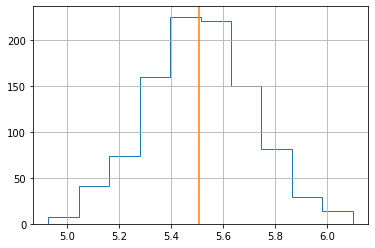

In [225]:
bootstrap.meangrade.hist(histtype='step')
pp.axvline(pop.grade.mean(),color='C1')

In [226]:
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.115599991752777, 5.9248186450293225)

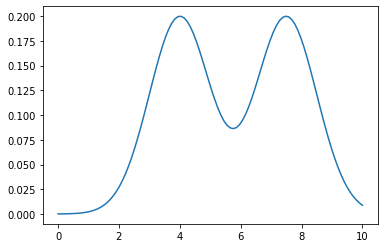

In [227]:
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

x = np.linspace(0,10,100)
pp.plot(x,0.5*n1.pdf(x) + 0.5*n2.pdf(x))

In [228]:
def draw():
    while True:
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0 <= v <= 10:
            return v

In [229]:
def dataset(n=100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

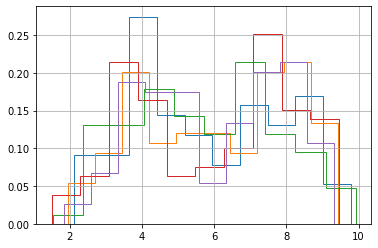

In [230]:
for i in range(5):
    dataset(100).grade.hist(histtype='step',density=True)

In [231]:
means = pd.DataFrame({'meangrade': [dataset(100).grade.mean() for i in range(1000)]})

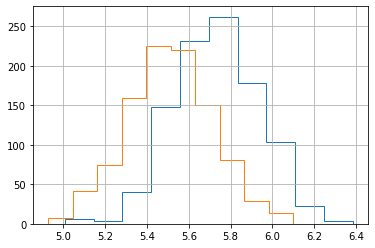

In [232]:
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')

## Hypothesis Testing

In [233]:
pumps = pd.read_csv('./Ex_Files_Python_Statistics_EssT/Exercise Files/chapter4/04_04/pumps.csv')
pumps.head()

,lat,lon,x,y
0,51.513341,-0.136668,0.000000,0.000000
1,51.513876,-0.139586,-0.201858,0.059469
2,51.514906,-0.139671,-0.207738,0.173961
3,51.512354,-0.131630,0.348513,-0.109712
4,51.512139,-0.133594,0.212650,-0.133611


In [234]:
cholera = pd.read_csv('./Ex_Files_Python_Statistics_EssT/Exercise Files/chapter4/04_04/cholera.csv')
cholera.head()

,deaths,lat,lon,x,y,closest
0,3,51.513418,-0.137930,-0.087301,0.008559,0
1,2,51.513361,-0.137883,-0.084050,0.002223,0
2,1,51.513317,-0.137853,-0.081975,-0.002668,0
3,1,51.513262,-0.137812,-0.079138,-0.008781,0
4,4,51.513204,-0.137767,-0.076025,-0.015229,0


In [235]:
cholera.loc[::20]

,deaths,lat,lon,x,y,closest
0,3,51.513418,-0.137930,-0.087301,0.008559,0
20,2,51.513441,-0.138762,-0.144856,0.011116,1
40,2,51.513025,-0.139036,-0.163811,-0.035126,1
60,1,51.512765,-0.137533,-0.059838,-0.064027,0
80,1,51.512782,-0.136819,-0.010446,-0.062137,0
100,4,51.512250,-0.135394,0.088131,-0.121273,5
120,1,51.513238,-0.134594,0.143473,-0.011449,4
140,1,51.512585,-0.134793,0.129707,-0.084035,4
160,1,51.514065,-0.134364,0.159384,0.080478,0
180,1,51.515149,-0.135395,0.088062,0.200973,0


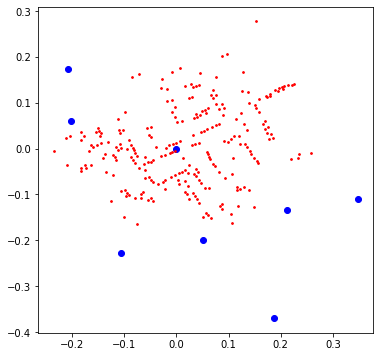

In [236]:
plt.figure(figsize=(6,6))
plt.scatter(pumps.x,pumps.y,color='b')
plt.scatter(cholera.x,cholera.y,color='r',s=3)

In [238]:
img = matplotlib.image.imread('./Ex_Files_Python_Statistics_EssT/Exercise Files/chapter4/04_04/london.png')

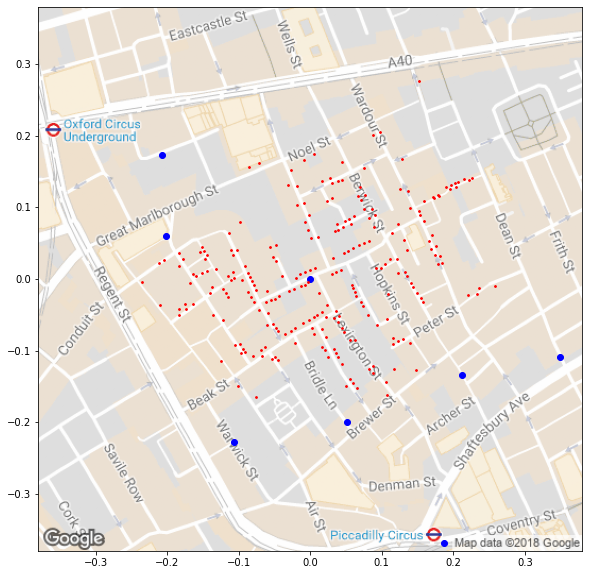

In [240]:
plt.figure(figsize=(10,10))

plt.imshow(img,extent=[-0.38,0.38,-0.38,0.38])

plt.scatter(pumps.x,pumps.y,color='b')
plt.scatter(cholera.x,cholera.y,color='r',s=3)

In [241]:
cholera.closest.value_counts()

0    171
1     36
4     19
5     13
7      9
2      2
Name: closest, dtype: int64

In [242]:
cholera.groupby('closest').deaths.sum()

closest
0    340
1     65
2      5
4     40
5     27
7     12
Name: deaths, dtype: int64

In [243]:
def simulate(n):
    return pd.DataFrame({'closest': np.random.choice([0,1,4,5],size=n,p=[0.65,0.15,0.10,0.10])})

In [244]:
simulate(489).closest.value_counts()

0    331
1     74
5     47
4     37
Name: closest, dtype: int64

In [245]:
sampling = pd.DataFrame({'counts': [simulate(489).closest.value_counts()[0] for i in range(10000)]})

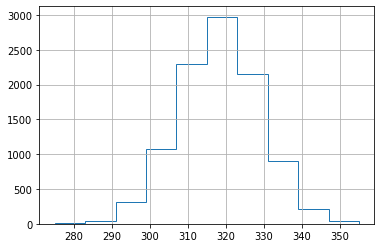

In [246]:
sampling.counts.hist(histtype='step')

In [248]:
100 - scipy.stats.percentileofscore(sampling.counts,340)

1.8799999999999955

## P-value and Confidence Interval

In [251]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [252]:
def sample(brown, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [253]:
dist = pd.DataFrame({'Brown': [sample(0.50,1000).vote.value_counts(normalize=True)['Brown'] for i in range(10000)]})

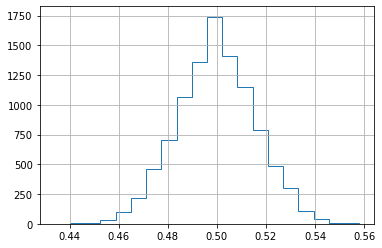

In [254]:
dist.Brown.hist(histtype='step',bins=20)

In [255]:
100 - scipy.stats.percentileofscore(dist.Brown,0.511)

23.769999999999996

In [256]:
largepoll = pd.read_csv('./Ex_Files_Python_Statistics_EssT/Exercise Files/chapter4/04_05/poll-larger.csv')

In [257]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

In [258]:
dist = pd.DataFrame({'Green': [sample(0.50,10000).vote.value_counts(normalize=True)['Green'] for i in range(1000)]})

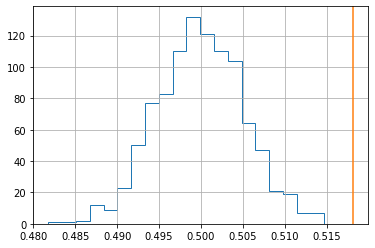

In [259]:
dist.Green.hist(histtype='step',bins=20)
pp.axvline(0.5181,c='C1')

## Bayesian Inference

In [260]:
import pymc3 as pm

In [261]:
n = 100
k = 61


with pm.Model() as coin_context:
    p = pm.Uniform('p',0.40,0.80)
    y = pm.Binomial('y',n=n,p=p,observed=k)
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [00:09<00:00, 2209.15draws/s]


In [262]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
p,0.608,0.048,0.518,0.696,0.001,0.0,7788.0,7788.0,7803.0,12595.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1388a1c10>,
      dtype=object)

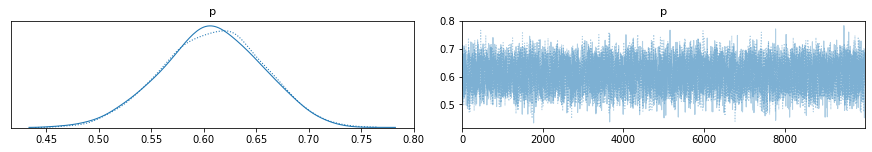

In [263]:
pm.traceplot(trace)

In [281]:
gdata = gapminder[gapminder.year==1985]
gdata.sort_values('age5_surviving')

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day,log10_gdp_per_day
9768,Niger,1985,Africa,6838170.0,44.63,66.71,7.78,997.0,2.729637,0.436105
8391,Mali,1985,Africa,7831891.0,46.68,71.50,7.09,1001.0,2.740589,0.437844
11712,Sierra Leone,1985,Africa,3466044.0,53.14,72.72,6.89,1415.0,3.874059,0.588166
5394,Guinea,1985,Africa,5078689.0,47.33,73.69,6.64,1085.0,2.970568,0.472840
9201,Mozambique,1985,Africa,13102982.0,50.02,74.59,6.40,379.0,1.037645,0.016049
...,...,...,...,...,...,...,...,...,...,...
12765,Switzerland,1985,Europe,6455680.0,76.99,99.10,1.54,42462.0,116.254620,2.065410
5880,Iceland,1985,Europe,241411.0,77.85,99.23,2.15,25997.0,71.175907,1.852333
12684,Sweden,1985,Europe,8350814.0,76.72,99.24,1.74,28202.0,77.212868,1.887690
6609,Japan,1985,Asia,119988663.0,77.80,99.25,1.72,23554.0,64.487337,1.809474


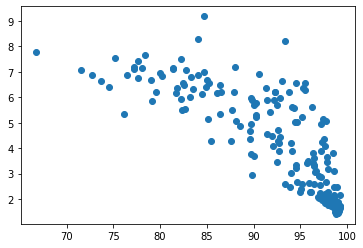

In [282]:
plt.scatter(gdata['age5_surviving'], gdata['babies_per_woman'])

In [283]:
with pm.Model() as gapminder_context:
    intercept = pm.Uniform('intercept',5,15)
    slope = pm.Uniform('slope',-1,1)
    
    babies = pm.Normal('babies',
                       mu = intercept + slope * (gdata['age5_surviving'] - 65),
                       sd = 1,
                       observed = gdata['babies_per_woman'])
    
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [slope, intercept]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [00:20<00:00, 1040.37draws/s]
The acceptance probability does not match the target. It is 0.9150123813711563, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8989642387741786, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [284]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
intercept,10.189,0.282,9.658,10.711,0.005,0.003,3891.0,3891.0,3893.0,4112.0,1.0
slope,-0.219,0.010,-0.238,-0.200,0.000,0.000,3858.0,3858.0,3863.0,4030.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1397f2610>,
      dtype=object)

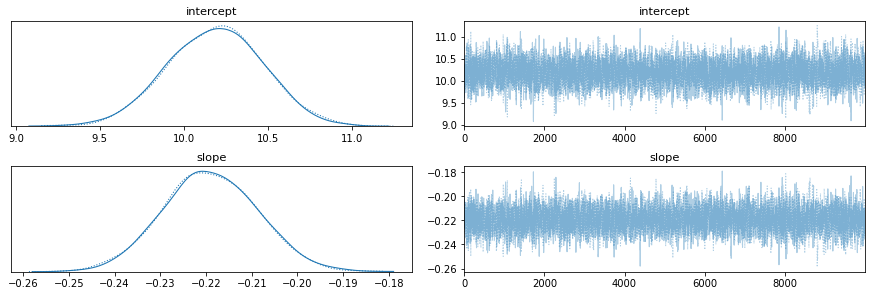

In [285]:
pm.traceplot(trace)

In [286]:
babies = trace['intercept'].mean() + trace['slope'].mean() * (gdata['age5_surviving'] - 65)

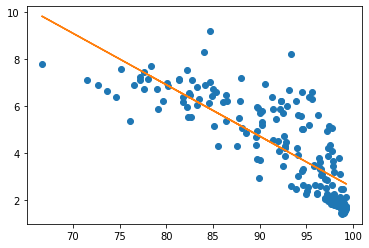

In [287]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])
pp.plot(gdata['age5_surviving'],babies,'C1')

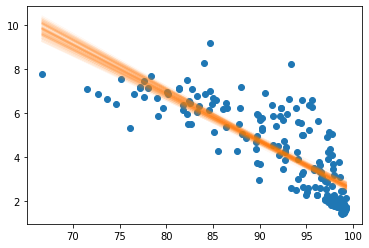

In [288]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])

for i, intercept, slope in zip(range(100),trace['intercept'][::50],trace['slope'][::50]):
    babies = intercept + slope * (gdata['age5_surviving'] - 65)
    pp.plot(gdata['age5_surviving'],babies,'C1',alpha=0.05)